# 02 Data exploration

Start by some quick data exploration. Perform the following tasks

- Plot a few images from each category
- Make a scree plot, how many PCA components explain 10%, 20%, …, 90% and 100% of the variance?
- Visualize the features on a 2d-plot with PCA using the first two components. What can you say about the results?

In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import pandas as pd
import os
import PIL.Image as Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_dir = os.path.join('swissroads', 'train')
os.listdir(train_dir)

['car', '.DS_Store', 'bike', 'other', 'van', 'motorcycle', 'truck']

In [3]:
train_generator = ImageDataGenerator(rescale = 1/255, horizontal_flip = True, rotation_range = 5)

trainset = train_generator.flow_from_directory(
    os.path.join('swissroads','train'), batch_size = 32, target_size = (299,299), shuffle = True)

Found 280 images belonging to 6 classes.


In [4]:
trainset.class_indices

{'bike': 0, 'car': 1, 'motorcycle': 2, 'other': 3, 'truck': 4, 'van': 5}

### Plot 10 images from each category

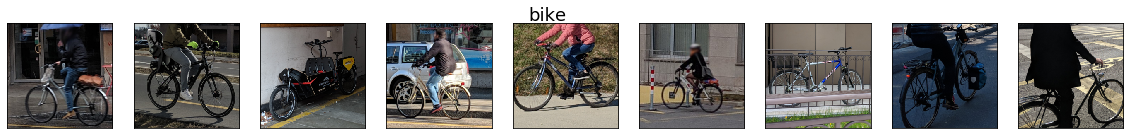

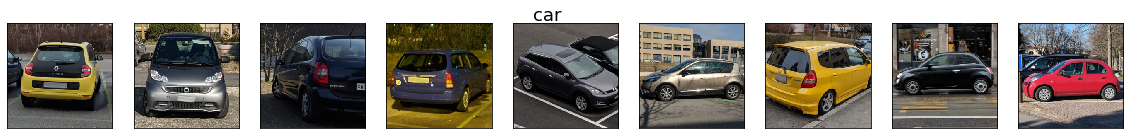

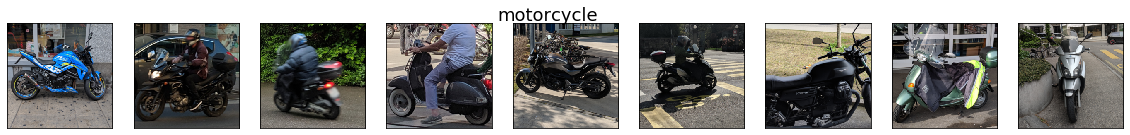

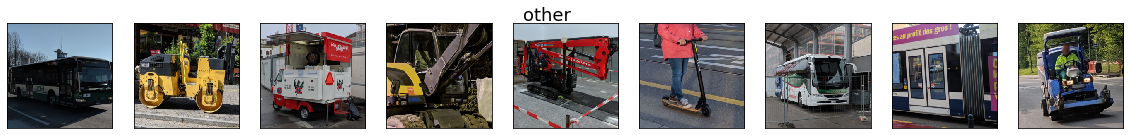

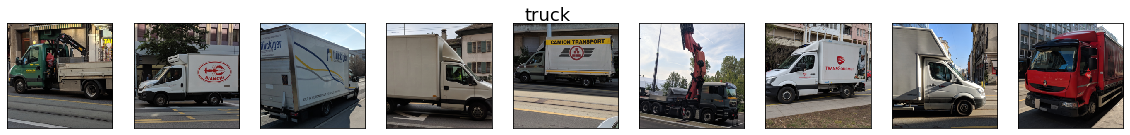

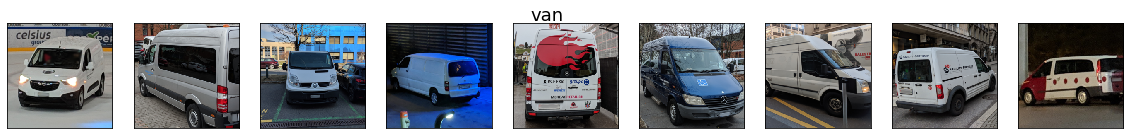

In [5]:
for img_class in trainset.class_indices:
    # print(img_class)
    # print(os.path.join(train_dir, img_class))
    class_directory = os.path.join(train_dir, img_class)
    #get the paths of the first 10 images per class
    n_image_paths =  [f.path for f in os.scandir(class_directory)][:9]
    # images = np.array([Image.open(f) for f in n_image_paths]) ---- does not work!
    image_list = []
    for i, f in enumerate(n_image_paths):
      #  print(i,f)
        img = Image.open(f)
        image_list.append(img)
    #for i in range(9):
    #    plt.imshow(image_list[i])
    fig, axes = plt.subplots(nrows = 1, ncols = 9, figsize = (20,2))
    fig.suptitle(img_class, fontsize = 18)
    for i, axis in enumerate(axes):
        image = image_list[i]
        axis.imshow(image)
        axis.get_xaxis().set_visible(False)
        axis.get_yaxis().set_visible(False)
   
    plt.show()
    
#    for f in n_image_paths:
#        img = Image.open(f)
#        plt.imshow(img)
#        plt.show()

We load the high-level features.

In [6]:
features_tr = np.load('features_tr.npz')

In [7]:
with np.load('features_tr.npz', allow_pickle = False) as npz_file:
    features = dict(npz_file.items())

In [8]:
features_tr.items()

ItemsView(<numpy.lib.npyio.NpzFile object at 0x7f8d1cfbfa90>)

In [9]:
list(features_tr.items())

[('arr_0',
  array([[0.11795355, 0.495086  , 0.00611319, ..., 0.4111639 , 0.5282178 ,
          0.35089248],
         [0.36880675, 0.03741808, 0.06134069, ..., 0.03178733, 0.12434589,
          0.33885857],
         [0.17505908, 0.17129377, 0.08342641, ..., 0.40382445, 0.35170949,
          0.08530146],
         ...,
         [0.06374948, 0.09721467, 0.09279408, ..., 0.16326569, 0.08800916,
          0.49301142],
         [0.03244293, 0.04265665, 0.5425262 , ..., 0.03992088, 0.00845145,
          0.7947877 ],
         [0.09048267, 0.15363304, 0.5948415 , ..., 0.3038381 , 0.00263685,
          0.8519135 ]], dtype=float32))]

In [10]:
features_tr.keys()

KeysView(<numpy.lib.npyio.NpzFile object at 0x7f8d1cfbfa90>)

In [11]:
(features_tr.values)

<bound method Mapping.values of <numpy.lib.npyio.NpzFile object at 0x7f8d1cfbfa90>>

In [12]:
X = np.array([list(v) for v in features_tr.values()])

### Question on reading an array from .npz

In [13]:
X.shape

(1, 280, 2048)

In [14]:
X2 = np.load('features_tr.npy')

In [15]:
X2.shape

(280, 2048)

I add the mean and std of all the data (axis = 0 column, axis = 1 relative to the rows) to see wheather the data are already scaled or not.

In [16]:
X.mean(axis = 1).mean()

0.26454738

In [17]:
X.std(axis = 1).std()

0.089815915

The data are scaled.

In [18]:
y = np.load('labels_tr.npy')

In [19]:
y.shape

(280,)

In [20]:
trainset.class_indices

{'bike': 0, 'car': 1, 'motorcycle': 2, 'other': 3, 'truck': 4, 'van': 5}

In [21]:
{'bike': 0, 'car': 1, 'motorcycle': 2, 'other': 3, 'truck': 4, 'van': 5}

{'bike': 0, 'car': 1, 'motorcycle': 2, 'other': 3, 'truck': 4, 'van': 5}

### Scree Plot and PCA components

In [22]:
from sklearn.decomposition import PCA

since the PCA algorithm favors the variables with a large variance we need to standardize the data.

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X2_rescaled = scaler.fit_transform(X2)

In [24]:
# create a PCA transformer for all the components
pca = PCA(n_components = None)

In [25]:
# pca.fit(): compute the n principal components ( a set of orthogonal axes)
# pca.transform(): project the data to the principal components

pca.fit(X2_rescaled, y = None) # PCA is unsupervised learning so labels are not needed

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In a scree plot we plot all the principal components and their contribution to the variance. It shows the proportion of variance explained for each component. In this case we can visualize how much information corresponds to each principal component and determine the number of dimentions to keep.

In [26]:
pve = pca.explained_variance_ratio_
pve

array([1.0644611e-01, 8.5725822e-02, 7.1066409e-02, 4.8273481e-02,
       2.7798729e-02, 2.3930181e-02, 2.2333145e-02, 1.8242825e-02,
       1.6587337e-02, 1.4812760e-02, 1.4112710e-02, 1.3021235e-02,
       1.2460291e-02, 1.2372279e-02, 1.0949046e-02, 1.0850606e-02,
       9.8491367e-03, 9.1991462e-03, 8.9761615e-03, 8.7682847e-03,
       8.3809383e-03, 8.0898535e-03, 7.8950031e-03, 7.5944900e-03,
       7.4060685e-03, 7.2717355e-03, 6.8456694e-03, 6.8115583e-03,
       6.3711009e-03, 6.2136250e-03, 6.0123783e-03, 5.9196251e-03,
       5.8182650e-03, 5.6056776e-03, 5.5523622e-03, 5.3448142e-03,
       5.2715871e-03, 5.2071577e-03, 5.0635645e-03, 5.0165472e-03,
       4.8069041e-03, 4.7724675e-03, 4.6662567e-03, 4.5161447e-03,
       4.3859296e-03, 4.2785192e-03, 4.2371252e-03, 4.1619614e-03,
       4.1078888e-03, 4.0229810e-03, 3.9590220e-03, 3.9455788e-03,
       3.7939523e-03, 3.6918840e-03, 3.6621003e-03, 3.6126298e-03,
       3.5798782e-03, 3.5397292e-03, 3.4012618e-03, 3.3761780e

In [27]:
pve.shape

(280,)

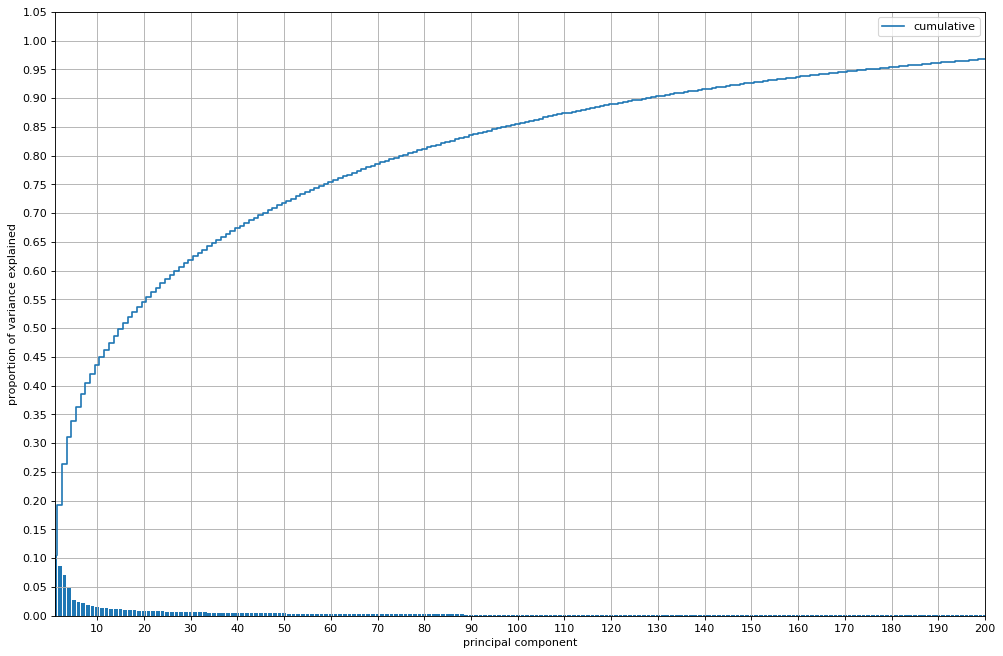

In [28]:
from matplotlib.pyplot import figure
from matplotlib.ticker import PercentFormatter

figure(figsize = (15,10), dpi = 80)
xcor = np.arange(1, len(pve) +1 )
plt.bar(xcor, pve)
plt.xticks(xcor)

# cumulative sum of all the components
pve_cumsum = np.cumsum(pve)

plt.step( xcor + 0.5 ,
          pve_cumsum,
          label = 'cumulative')
# plt.yaxis.set_major_formatter(PercentFormatter())

plt.xticks(np.arange(0,280,10))
plt.yticks(np.arange(0,1.1, step = 0.05))

plt.xlim(1, 200)
plt.grid(b=None, which='major', axis='both', linestyle = '-')
plt.xlabel('principal component')
plt.ylabel('proportion of variance explained')
plt.legend()
plt.show()

We see from the scree plot that the first 30 components accoount for about 60% of the total variance and the first two for less than 30% 

we need the first 100 principal components to get 80% of the information and the first 170 principaö components for 95% of the variance (5% loss).

### Visualize the features on a 2d-plot with PCA using the first two components

I will summarize the dataset in a 2d plot. I will use a PCA with the first two components.

In [29]:
pca2 = PCA(n_components = 2)

I will use all the 280 images

In [30]:
pca2.fit(X2_rescaled)
X_2d = pca2.transform(X2_rescaled)

In [31]:
pca2.components_

array([[-0.00837231,  0.02160793, -0.00605356, ..., -0.0230618 ,
         0.00361635, -0.016814  ],
       [ 0.00659297,  0.01002425, -0.01961972, ...,  0.00437749,
         0.03198015, -0.0013112 ]], dtype=float32)

In [32]:
pca2.components_.shape

(2, 2048)

In [33]:
# create a dataframe with variance and principal components
results_df = pd.DataFrame({
    'variance': X2_rescaled.var(axis = 0),
    '1st component': pca2.components_[0],
    '2nd component': pca2.components_[1]
})

In [34]:
results_df.sort_values('1st component', ascending = False).head(10)

,variance,1st component,2nd component
1269,1.000001,0.058988,0.000752
1259,1.000000,0.055053,-0.014671
1672,1.000000,0.051844,-0.003395
99,1.000000,0.050173,0.028427
1743,1.000000,0.049842,0.036434
318,1.000000,0.048047,0.035045
1225,1.000000,0.047872,-0.015287
1890,0.999999,0.047872,0.027837
1820,0.999999,0.046580,0.018740
1158,0.999999,0.045953,-0.025345


In [35]:
pve2 = pca2.explained_variance_ratio_
pve2

array([0.10644618, 0.08572572], dtype=float32)

the first principal component accounts for about 10% of the information (variance) while the second principal component for the 8%. 

In [36]:
classes = ['bike', 'car', 'motorcycle', 'other', 'truck', 'van']
classes

['bike', 'car', 'motorcycle', 'other', 'truck', 'van']

In [37]:
trainset.class_indices

{'bike': 0, 'car': 1, 'motorcycle': 2, 'other': 3, 'truck': 4, 'van': 5}

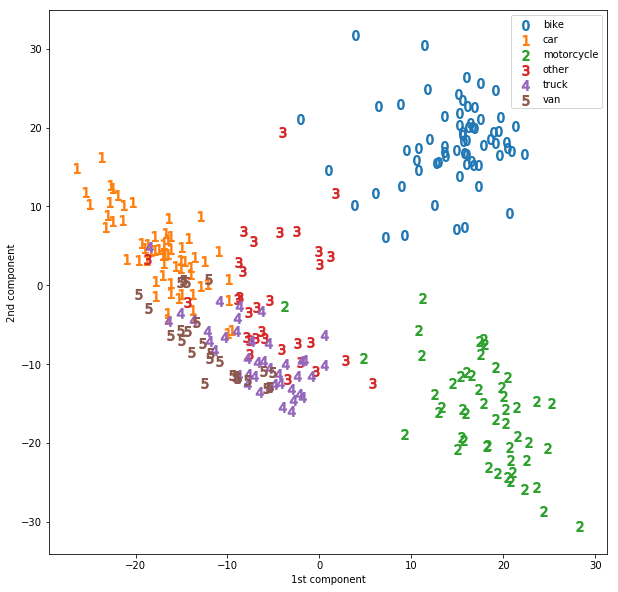

In [38]:
fig = plt.figure(figsize = (10,10))
for label in [0, 1, 2, 3, 4, 5]:
    idx = (y == label)
    plt.scatter(X_2d[idx,0], X_2d[idx,1], marker = "${}$".format(label), s= 100)
    # plt.scatter(X_rescaled_2d_sub[idx, 0], X_rescaled_2d_sub[idx, 1], label = 'type {}'.format(kind))
plt.legend({'bike': 0, 'car': 1, 'motorcycle': 2, 'other': 3, 'truck': 4, 'van': 5})
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.show()

We may just take the first 150 or 170 or so principal components

In [39]:
X_2d.mean(axis = 1)

array([ 17.26408   ,  18.919428  ,  20.49971   ,   9.497406  ,
         6.623707  ,  17.816654  ,  16.968678  ,  18.355976  ,
        13.26568   ,  17.974588  ,  18.92847   ,  19.514248  ,
        18.304785  ,  16.040844  ,  18.0747    ,  16.138767  ,
        14.979597  ,  19.220205  ,  17.74804   ,  14.071011  ,
        15.602661  ,  14.886002  ,  18.597555  ,  11.3605    ,
        15.903135  ,   6.9724765 ,  21.932083  ,  19.447168  ,
        15.255306  ,  10.720834  ,  16.225122  ,  11.007713  ,
        17.514786  ,  19.69697   ,   7.758292  ,  14.545906  ,
        19.684914  ,  12.670846  ,  20.952965  ,  19.542767  ,
        19.205753  ,  18.533937  ,  21.198307  ,   7.8076916 ,
        14.1365795 ,  19.41177   ,  17.234718  ,  17.487482  ,
        13.226948  ,  11.566949  ,  18.454437  ,  15.18897   ,
        18.387882  ,  18.485954  ,  15.962007  ,  14.558149  ,
        19.286577  ,  15.693127  ,  14.265089  ,  17.787695  ,
        16.202589  ,  21.59917   ,   8.886183  ,  14.92

We can observe that the category "motobike" and "bike" are pretty much seperate from each other but the rest of the categories are not so clearly distinguishable.